# Aircraft Accident Analysis Using NLP

In [1]:
import pyodbc

# Define the path to the database
database_path = r"C:\Users\johnn\Research6\avall.mdb"

conn = pyodbc.connect(
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    f"DBQ={database_path};"
)


cursor = conn.cursor()


In [2]:
import pandas as pd


query = "SELECT * FROM aircraft"

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

df.head()


C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\3232973481.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,...,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna
0,20080211X00175,1,N530NA,DFW08RA039,N,NUSN,None,None,SUBS,None,...,None,NaN,NaN,N,N,False,False,False,False,False
1,20080107X00026,1,N8037W,SEA08LA057A,N,091,NONE,None,MINR,NONE,...,7,2700.0,45.0,N,N,False,False,False,False,False
2,20080107X00026,2,N15EX,SEA08LA057B,N,091,NONE,None,SUBS,NONE,...,7,2700.0,45.0,N,N,False,False,False,False,False
3,20080109X00036,1,N579RM,DFW08CA054,N,091,NONE,N,SUBS,NONE,...,090,5003.0,100.0,N,N,False,False,False,False,False
4,20080107X00027,1,N398J,DFW08LA055,N,091,IFR,Y,None,NONE,...,None,NaN,NaN,N,N,False,False,False,False,False


In [3]:

query1 = "SELECT * FROM narratives"


df1 = pd.read_sql_query(query1, conn)


df1.head()


C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\1340881653.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(query1, conn)


,ev_id,Aircraft_Key,narr_accp,narr_accf,narr_cause,narr_inc,lchg_date,lchg_userid
0,20080211X00175,1,import,None,None,None,2023-08-03 13:29:08,gibs-i
1,20080107X00026,1,"On January 1, 2008, about 1430 Pacific standar...",The pilots were attending a fly-in at the airp...,The departing pilot's inadequate visual lookou...,None,2020-09-25 18:05:31,None
2,20080107X00026,2,"On January 1, 2008, about 1430 Pacific standar...",The pilots were attending a fly-in at the airp...,The departing pilot's inadequate visual lookout.,None,2020-09-25 18:05:31,None
3,20080109X00036,1,The private pilot was conducting a touch-and-g...,The private pilot was conducting a touch-and-g...,The pilot's failure to maintain directional co...,None,2020-09-25 18:05:31,None
4,20080107X00027,1,"On January 3, 2008, approximately 0225 central...","After an uneventful landing at night, the comm...",The line technician's failure to remain clear ...,None,2020-09-25 18:04:02,None


In [4]:

query2 = "SELECT * FROM injury"

df2 = pd.read_sql_query(query2, conn)


df2.head(10)


C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\1748623148.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(query2, conn)


,ev_id,Aircraft_Key,inj_person_category,injury_level,inj_person_count,lchg_date,lchg_userid
0,20080211X00175,1,Flig,FATL,0.0,2023-08-03 13:29:08,gibs-i
1,20080211X00175,1,Flig,SERS,0.0,2023-08-03 13:29:08,gibs-i
2,20080211X00175,1,Flig,MINR,0.0,2023-08-03 13:29:08,gibs-i
3,20080211X00175,1,Flig,NONE,2.0,2023-08-03 13:29:08,gibs-i
4,20080211X00175,1,Flig,TOTL,0.0,2023-08-03 13:29:08,gibs-i
5,20080107X00026,1,Flig,FATL,0.0,2020-09-25 18:05:31,None
6,20080107X00026,1,Flig,SERS,0.0,2020-09-25 18:05:31,None
7,20080107X00026,1,Flig,MINR,0.0,2020-09-25 18:05:31,None
8,20080107X00026,1,Flig,NONE,1.0,2020-09-25 18:05:31,None
9,20080107X00026,1,Flig,TOTL,0.0,2020-09-25 18:05:31,None


In [5]:
merged_df = pd.merge(df, df1, on=['ev_id', 'Aircraft_Key'], how='outer', suffixes=('_df', '_df'))

In [6]:
# Summarize the injury data
injury_summary = df2.groupby(['ev_id', 'Aircraft_Key', 'lchg_date']).agg(
    total_injuries=('inj_person_count', 'sum'),  # Total count of injuries
    fatal_injuries=('inj_person_count', lambda x: x[df2['injury_level'] == 'FATL'].sum()),  # Sum of fatal injuries
    non_fatal_injuries=('inj_person_count', lambda x: x[df2['injury_level'] != 'FATL'].sum())  # Sum of non-fatal injuries
).reset_index()

In [7]:
# Merge the summarized injury data with merged_df
final_merged_df = pd.merge(merged_df, injury_summary, on=['ev_id', 'Aircraft_Key'], how='left')

In [8]:
final_merged_df.drop(['flight_plan_activated', 'owner_acft', 'owner_street', 'owner_city', 'owner_state', 'owner_zip'], axis=1, inplace=True)

In [9]:

query3 = "SELECT * FROM Events_Sequence"

df3 = pd.read_sql_query(query3, conn)

df3.head(10)

C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\601337154.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(query3, conn)


,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20080107X00026,1,1,550250,Landing Midair collision,550,250,True,2020-09-25 18:05:31,None
1,20080107X00026,2,1,350250,Initial climb Midair collision,350,250,True,2020-09-25 18:05:31,None
2,20080109X00036,1,1,551230,Landing-flare/touchdown Loss of control on ground,551,230,True,2020-09-25 18:05:31,None
3,20080109X00036,1,2,550300,Landing Runway excursion,550,300,False,2020-09-25 18:05:31,None
4,20080107X00027,1,1,153081,Standing-engine(s) operating AC/prop/rotor con...,153,081,True,2020-09-25 18:04:02,None
5,20080115X00051,1,1,551240,Landing-flare/touchdown Loss of control in flight,551,240,True,2020-09-25 18:06:16,None
6,20080115X00051,1,2,551470,Landing-flare/touchdown Collision with terr/ob...,551,470,False,2020-09-25 18:06:16,None
7,20080115X00047,1,1,600341,Emergency descent Loss of engine power (total),600,341,True,2020-09-25 18:04:02,None
8,20080115X00047,1,2,552470,Landing-landing roll Collision with terr/obj (...,552,470,False,2020-09-25 18:04:02,None
9,20080123X00096,1,1,350240,Initial climb Loss of control in flight,350,240,True,2020-09-25 18:06:16,None


In [10]:
# Summarizing the occurrence data for each incident
occurance_summary = df3.groupby(['ev_id', 'Aircraft_Key','phase_no','eventsoe_no']).agg(
    total_occurance=('Occurrence_Description', lambda x: ', '.join(x))  # Concatenate occurrences with commas
).reset_index()

# Display the summarized data
occurance_summary.head(10)


,ev_id,Aircraft_Key,phase_no,eventsoe_no,total_occurance
0,20080107X00026,1,550,250,Landing Midair collision
1,20080107X00026,2,350,250,Initial climb Midair collision
2,20080107X00027,1,153,081,Standing-engine(s) operating AC/prop/rotor con...
3,20080109X00036,1,550,300,Landing Runway excursion
4,20080109X00036,1,551,230,Landing-flare/touchdown Loss of control on ground
5,20080114X00044,1,500,342,Approach Loss of engine power (partial)
6,20080115X00046,1,508,341,Approach-VFR pattern final Loss of engine powe...
7,20080115X00047,1,552,470,Landing-landing roll Collision with terr/obj (...
8,20080115X00047,1,600,341,Emergency descent Loss of engine power (total)
9,20080115X00051,1,551,240,Landing-flare/touchdown Loss of control in flight


In [11]:
# Merge the summarized injury data with merged_df
final_merged_df = pd.merge(final_merged_df, occurance_summary, on=['ev_id', 'Aircraft_Key'], how='left')

In [12]:
df_with_nans = final_merged_df[final_merged_df.isna().any(axis=1)]
print(df_with_nans)


                ev_id  Aircraft_Key regis_no      ntsb_no acft_missing  \
0      20080211X00175             1   N530NA   DFW08RA039            N   
1      20080107X00026             1   N8037W  SEA08LA057A            N   
2      20080107X00026             2    N15EX  SEA08LA057B            N   
3      20080109X00036             1   N579RM   DFW08CA054            N   
4      20080109X00036             1   N579RM   DFW08CA054            N   
...               ...           ...      ...          ...          ...   
61241  20241029195408             1   N805RV   WPR25LA028            N   
61242  20241029195410             1   N511JG   ERA25LA030            N   
61243  20241030195412             1   N162UP   DCA25LA015            N   
61244  20241030195414             1   B-1243   DCA25WA016            N   
61245  20241030195417             1   N885CA   WPR25LA029            N   

      far_part flt_plan_filed damage acft_fire acft_expl  ... narr_inc  \
0         NUSN           None   SUBS 

In [13]:
nan_counts = final_merged_df.isna().sum()
print(nan_counts)


ev_id                    0
Aircraft_Key             0
regis_no                50
ntsb_no                  0
acft_missing             0
                      ... 
fatal_injuries        1494
non_fatal_injuries    1494
phase_no               724
eventsoe_no            724
total_occurance        724
Length: 76, dtype: int64


In [14]:
# Fill missing values in text columns with a placeholder 
final_merged_df['narr_accp'].fillna('No Information', inplace=True)
final_merged_df['narr_accf'].fillna('No Information', inplace=True)
final_merged_df['narr_cause'].fillna('No Information', inplace=True)


In [16]:
# Fill missing numerical columns with 0 (assuming missing values indicate 0 injuries)
final_merged_df['total_injuries'].fillna(0, inplace=True)
final_merged_df['fatal_injuries'].fillna(0, inplace=True)
final_merged_df['non_fatal_injuries'].fillna(0, inplace=True)


In [17]:
# Drop columns where a significant portion of the data is missing ( more than 50% NaN)
threshold = len(final_merged_df) * 0.5
final_merged_df.dropna(axis=1, thresh=threshold, inplace=True)


In [18]:
# Fill missing values with a placeholder string for categorical columns
final_merged_df['regis_no'].fillna('Unknown', inplace=True)
final_merged_df['acft_make'].fillna('Unknown', inplace=True)
final_merged_df['acft_model'].fillna('Unknown', inplace=True)
# Fill with a specific value or placeholder for moderate missing values
final_merged_df['far_part'].fillna('Unknown', inplace=True)
final_merged_df['flt_plan_filed'].fillna('Not Filed', inplace=True)
final_merged_df['damage'].fillna('Unknown', inplace=True)


In [19]:
# dropping columns with excessive missing values
high_missing_cols = ['elt_oper', 'oper_name', 'afm_hrs']
final_merged_df.drop(columns=high_missing_cols, inplace=True)


In [21]:
# Example of filling with a placeholder
final_merged_df['acft_fire'].fillna('None', inplace=True)
final_merged_df['acft_expl'].fillna('None', inplace=True)
final_merged_df['oper_individual_name'].fillna('Unknown', inplace=True)
# Example of filling numeric columns with the median
final_merged_df['num_eng'].fillna(final_merged_df['num_eng'].median(), inplace=True)

# Example of filling with a placeholder for categorical data
final_merged_df['acft_serial_no'].fillna('Unknown', inplace=True)
final_merged_df['acft_category'].fillna('Not Specified', inplace=True)
final_merged_df['oper_city'].fillna('Unknown', inplace=True)
final_merged_df['oper_state'].fillna('Unknown', inplace=True)
# Forward fill NaN values with the last valid observation
final_merged_df['lchg_date'].fillna(method='ffill', inplace=True)
final_merged_df['date_last_insp'].fillna(method='ffill', inplace=True)

final_merged_df['phase_no'].fillna('No Information', inplace=True)
final_merged_df['eventsoe_no'].fillna('No Information', inplace=True)
final_merged_df['total_occurance'].fillna('No Information', inplace=True)

C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\3939176507.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_merged_df['lchg_date'].fillna(method='ffill', inplace=True)
C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\3939176507.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_merged_df['date_last_insp'].fillna(method='ffill', inplace=True)


In [22]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61246 entries, 0 to 61245
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ev_id                    61246 non-null  object        
 1   Aircraft_Key             61246 non-null  int64         
 2   regis_no                 61246 non-null  object        
 3   ntsb_no                  61246 non-null  object        
 4   acft_missing             61246 non-null  object        
 5   far_part                 61246 non-null  object        
 6   flt_plan_filed           61246 non-null  object        
 7   damage                   61246 non-null  object        
 8   acft_fire                61246 non-null  object        
 9   acft_expl                61246 non-null  object        
 10  acft_make                61246 non-null  object        
 11  acft_model               61246 non-null  object        
 12  acft_serial_no           61246 n

In [23]:

columns_to_drop = ['cert_max_gr_wt', 'elt_install', 'type_last_insp', 'dprt_time','dest_apt_id','second_pilot','dprt_apt_id','dprt_city','dprt_state','dprt_country','dest_city','dest_state','dest_country','rwy_num', 'rwy_len', 'rwy_width', 'site_seeing' ,'air_medical']
final_merged_df.drop(columns=columns_to_drop,axis=1 ,inplace=True)


In [24]:
# Check for remaining missing values
print(final_merged_df.isna().sum())

ev_id                         0
Aircraft_Key                  0
regis_no                      0
ntsb_no                       0
acft_missing                  0
far_part                      0
flt_plan_filed                0
damage                        0
acft_fire                     0
acft_expl                     0
acft_make                     0
acft_model                    0
acft_serial_no                0
acft_category                 0
homebuilt                     0
num_eng                       0
fixed_retractable             0
date_last_insp                1
owner_country              2037
oper_individual_name          0
oper_city                     0
oper_state                    0
oper_country               2504
oper_zip                   9833
certs_held                 3818
type_fly                   6718
lchg_date_df                  0
afm_hrs_since                 0
commercial_space_flight       0
unmanned                      0
ifr_equipped_cert             0
elt_moun

In [25]:
final_merged_df.drop(['oper_country','oper_zip','certs_held','owner_country','lchg_date_df','type_fly'],axis=1 ,inplace=True)

In [26]:
print(final_merged_df.isna().sum())

ev_id                      0
Aircraft_Key               0
regis_no                   0
ntsb_no                    0
acft_missing               0
far_part                   0
flt_plan_filed             0
damage                     0
acft_fire                  0
acft_expl                  0
acft_make                  0
acft_model                 0
acft_serial_no             0
acft_category              0
homebuilt                  0
num_eng                    0
fixed_retractable          0
date_last_insp             1
oper_individual_name       0
oper_city                  0
oper_state                 0
afm_hrs_since              0
commercial_space_flight    0
unmanned                   0
ifr_equipped_cert          0
elt_mounted_aircraft       0
elt_connected_antenna      0
narr_accp                  0
narr_accf                  0
narr_cause                 0
lchg_date                  0
total_injuries             0
fatal_injuries             0
non_fatal_injuries         0
phase_no      

In [28]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Ensure nltk resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Step 1: Combine narrative columns into a single text field
final_merged_df['combined_narratives'] = final_merged_df['narr_accp'].astype(str) + ' ' + final_merged_df['narr_accf'].astype(str) + ' ' + final_merged_df['narr_cause'].astype(str)

# Step 2: Enhanced Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
    tokens = [word for word in tokens if len(word) > 3]  # Remove short words
    return " ".join(tokens)

# Apply preprocessing
final_merged_df['processed_text'] = final_merged_df['combined_narratives'].apply(preprocess_text)

# Step 3: Vectorize the processed text using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))  # Using bigrams as well
X = vectorizer.fit_transform(final_merged_df['processed_text'])

# Step 4: Feature Scaling (if you have numeric features to add)
numerical_features = final_merged_df[['phase_no', 'eventsoe_no']]  
# Replace 'No Information' with NaN
numerical_features = numerical_features.replace('No Information', pd.NA)

# Convert to numeric, forcing non-convertible values to NaN
numerical_features = numerical_features.apply(pd.to_numeric, errors='coerce')

# Handle NaNs 
numerical_features = numerical_features.fillna(numerical_features.mean())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
print(numerical_features.isna().sum())

phase_no       0
eventsoe_no    0
dtype: int64


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)


from scipy.sparse import hstack
X_final = hstack([X, X_scaled])
# Analyze the clusters based on the assigned data points
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_final)

# Add cluster labels to  DataFrame
final_merged_df['cluster'] = kmeans.labels_

# View the cluster distribution
cluster_counts = final_merged_df['cluster'].value_counts()
print(cluster_counts)

# View the descriptions in each cluster
for cluster_id in range(optimal_k):
    cluster_descriptions = final_merged_df[final_merged_df['cluster'] == cluster_id]['total_occurance']
    print(f"\nCluster {cluster_id} Accident Descriptions:")
    print(cluster_descriptions.head())


cluster
0    15992
1    15202
2    14872
4    10432
3     4748
Name: count, dtype: int64

Cluster 0 Accident Descriptions:
0                                       No Information
1                             Landing Midair collision
3                             Landing Runway excursion
4    Landing-flare/touchdown Loss of control on ground
6    Landing-flare/touchdown Loss of control in flight
Name: total_occurance, dtype: object

Cluster 1 Accident Descriptions:
2                   Initial climb Midair collision
10         Initial climb Loss of control in flight
12         Initial climb Loss of control in flight
13            Initial climb Aerodynamic stall/spin
14    Initial climb Sys/Comp malf/fail (non-power)
Name: total_occurance, dtype: object

Cluster 2 Accident Descriptions:
7     Landing-flare/touchdown Collision with terr/ob...
8     Landing-landing roll Collision with terr/obj (...
11    Uncontrolled descent Collision with terr/obj (...
15    Uncontrolled descent Collision 

Summary of Clusters:
Cluster 0 (Total: 15,992 occurrences):
Frequent themes involve landing issues such as runway excursions, midair collisions, and loss of control during flare/touchdown.

Cluster 1 (Total: 15,202 occurrences):
Dominated by incidents occurring during the initial climb, including midair collisions, loss of control, aerodynamic stalls, and system/component failures.

Cluster 2 (Total: 14,872 occurrences):
Primarily features landing-related collisions, including contact with terrain/objects and issues during emergency and uncontrolled descents.

Cluster 3 (Total: 4,748 occurrences):
This cluster highlights incidents occurring during pushback/towing, standing operations with engines running, and during takeoff with specific occurrences like ground collisions and attempted recoveries.

Cluster 4 (Total: 10,432 occurrences):
Focuses on landing issues, including nose-over/nose-down incidents, hard landings, and landing gear collapses.

Insights:
Landing Phase incidents are highly represented, emphasizing the critical nature of this flight phase.
Initial Climb issues indicate potential challenges related to loss of control, mechanical failures, and aerodynamic stall risks.
Ground Operations (Cluster 3) may point toward safety lapses or the need for improved protocols during pushback and takeoff.

Possible Actions:
Focused Safety Training targeting landing operations to mitigate runway excursions, loss of control, and nose-over incidents.
Systemic Checks during initial climb and takeoff phases to ensure mechanical integrity and enhance handling responses.
Improving Ground Procedures to reduce incidents during pushback and ground movements

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def perform_lda(accident_descriptions, num_topics=4):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(accident_descriptions)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    topics = {}
    for idx, topic in enumerate(lda.components_):
        cluster_descriptions = final_merged_df[final_merged_df['cluster'] == cluster_id]['total_occurance']
        top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
        print(f"Topic {idx+1}: {' '.join(top_words)}")
        topics[f"Topic {idx+1}"] = top_words

    return vectorizer, X, topics


In [92]:
# Extract text data for analysis
accident_descriptions = final_merged_df['total_occurance'].dropna().tolist()

# Perform LDA
vectorizer, X_lda, lda_topics = perform_lda(accident_descriptions, num_topics=4)

# Display topics
print("LDA Topics:")
for topic, terms in lda_topics.items():
    print(f"{topic}: {', '.join(terms)}")


Topic 1: enroute power engine loss approach cruise total vfr maneuvering low
Topic 2: landing roll touchdown emergency flare runway nose excursion field descent
Topic 3: collision non obj terr cfit descent takeoff uncontrolled fail sys
Topic 4: control loss flight ground initial climb takeoff landing contact impact
LDA Topics:
Topic 1: enroute, power, engine, loss, approach, cruise, total, vfr, maneuvering, low
Topic 2: landing, roll, touchdown, emergency, flare, runway, nose, excursion, field, descent
Topic 3: collision, non, obj, terr, cfit, descent, takeoff, uncontrolled, fail, sys
Topic 4: control, loss, flight, ground, initial, climb, takeoff, landing, contact, impact


In [96]:
 #Extracting descriptions for Cluster 0
cluster_0_accident_descriptions = final_merged_df[final_merged_df['cluster'] == 0]['total_occurance'].dropna().tolist()

# Perform LDA on the extracted descriptions
perform_lda(cluster_0_accident_descriptions)


Topic 1: maneuvering low flying alt loss flight control stall spin aerodynamic
Topic 2: landing runway excursion roll malf fail sys comp non power
Topic 3: power engine loss landing touchdown total flare area partial maneuvering
Topic 4: landing control loss ground approach vfr roll pattern flight final


(CountVectorizer(stop_words='english'),
 <15992x126 sparse matrix of type '<class 'numpy.int64'>'
 	with 79816 stored elements in Compressed Sparse Row format>,
 {'Topic 1': ['maneuvering',
   'low',
   'flying',
   'alt',
   'loss',
   'flight',
   'control',
   'stall',
   'spin',
   'aerodynamic'],
  'Topic 2': ['landing',
   'runway',
   'excursion',
   'roll',
   'malf',
   'fail',
   'sys',
   'comp',
   'non',
   'power'],
  'Topic 3': ['power',
   'engine',
   'loss',
   'landing',
   'touchdown',
   'total',
   'flare',
   'area',
   'partial',
   'maneuvering'],
  'Topic 4': ['landing',
   'control',
   'loss',
   'ground',
   'approach',
   'vfr',
   'roll',
   'pattern',
   'flight',
   'final']})

In [97]:
 #Extracting descriptions for Cluster 1
cluster_1_accident_descriptions = final_merged_df[final_merged_df['cluster'] == 1]['total_occurance'].dropna().tolist()

# Perform LDA on the extracted descriptions
perform_lda(cluster_1_accident_descriptions)


Topic 1: power engine loss enroute total non climb initial terr obj
Topic 2: climb initial flight control enroute loss cruise fuel stall spin
Topic 3: takeoff loss control runway flight ground excursion rejected collision land
Topic 4: enroute cruise encounter fail malf sys weather starvation vfr imc


(CountVectorizer(stop_words='english'),
 <15202x150 sparse matrix of type '<class 'numpy.int64'>'
 	with 76684 stored elements in Compressed Sparse Row format>,
 {'Topic 1': ['power',
   'engine',
   'loss',
   'enroute',
   'total',
   'non',
   'climb',
   'initial',
   'terr',
   'obj'],
  'Topic 2': ['climb',
   'initial',
   'flight',
   'control',
   'enroute',
   'loss',
   'cruise',
   'fuel',
   'stall',
   'spin'],
  'Topic 3': ['takeoff',
   'loss',
   'control',
   'runway',
   'flight',
   'ground',
   'excursion',
   'rejected',
   'collision',
   'land'],
  'Topic 4': ['enroute',
   'cruise',
   'encounter',
   'fail',
   'malf',
   'sys',
   'weather',
   'starvation',
   'vfr',
   'imc']})

In [98]:
 #Extracting descriptions for Cluster 2
cluster_2_accident_descriptions = final_merged_df[final_merged_df['cluster'] == 2]['total_occurance'].dropna().tolist()

# Perform LDA on the extracted descriptions
perform_lda(cluster_2_accident_descriptions)


Topic 1: non cfit obj terr collision descent landing uncontrolled maneuvering flying
Topic 2: landing emergency field descent roll encounter weather touchdown flare ditching
Topic 3: approach vfr collision pattern final terr obj cfit non autorotation
Topic 4: miscellaneous takeoff landing land collision maneuvering enroute touchdown event birdstrike


(CountVectorizer(stop_words='english'),
 <14872x103 sparse matrix of type '<class 'numpy.int64'>'
 	with 84750 stored elements in Compressed Sparse Row format>,
 {'Topic 1': ['non',
   'cfit',
   'obj',
   'terr',
   'collision',
   'descent',
   'landing',
   'uncontrolled',
   'maneuvering',
   'flying'],
  'Topic 2': ['landing',
   'emergency',
   'field',
   'descent',
   'roll',
   'encounter',
   'weather',
   'touchdown',
   'flare',
   'ditching'],
  'Topic 3': ['approach',
   'vfr',
   'collision',
   'pattern',
   'final',
   'terr',
   'obj',
   'cfit',
   'non',
   'autorotation'],
  'Topic 4': ['miscellaneous',
   'takeoff',
   'landing',
   'land',
   'collision',
   'maneuvering',
   'enroute',
   'touchdown',
   'event',
   'birdstrike']})

In [99]:
 #Extracting descriptions for Cluster 3
cluster_3_accident_descriptions = final_merged_df[final_merged_df['cluster'] == 3]['total_occurance'].dropna().tolist()

# Perform LDA on the extracted descriptions
perform_lda(cluster_3_accident_descriptions)


Topic 1: taxi ground flight terr controlled obj cfit collision runway enroute
Topic 2: unknown undetermined enroute climb initial takeoff non impact smoke cruise
Topic 3: prior flight event aircraft takeoff nose maintenance preflight dispatch gear
Topic 4: takeoff engine standing recovery remediation attempted event ground operating contact


(CountVectorizer(stop_words='english'),
 <4748x105 sparse matrix of type '<class 'numpy.int64'>'
 	with 21748 stored elements in Compressed Sparse Row format>,
 {'Topic 1': ['taxi',
   'ground',
   'flight',
   'terr',
   'controlled',
   'obj',
   'cfit',
   'collision',
   'runway',
   'enroute'],
  'Topic 2': ['unknown',
   'undetermined',
   'enroute',
   'climb',
   'initial',
   'takeoff',
   'non',
   'impact',
   'smoke',
   'cruise'],
  'Topic 3': ['prior',
   'flight',
   'event',
   'aircraft',
   'takeoff',
   'nose',
   'maintenance',
   'preflight',
   'dispatch',
   'gear'],
  'Topic 4': ['takeoff',
   'engine',
   'standing',
   'recovery',
   'remediation',
   'attempted',
   'event',
   'ground',
   'operating',
   'contact']})

In [100]:
 #Extracting descriptions for Cluster 4
cluster_4_accident_descriptions = final_merged_df[final_merged_df['cluster'] == 4]['total_occurance'].dropna().tolist()

# Perform LDA on the extracted descriptions
perform_lda(cluster_4_accident_descriptions)


Topic 1: unknown undetermined approach flight controlled terr cfit obj maneuvering vfr
Topic 2: landing remediation attempted recovery roll touchdown rotor float dragged wing
Topic 3: landing hard gear touchdown flare collapse impact post roll configured
Topic 4: landing nose roll contact runway abnormal touchdown flare aborted spin


(CountVectorizer(stop_words='english'),
 <10432x99 sparse matrix of type '<class 'numpy.int64'>'
 	with 41617 stored elements in Compressed Sparse Row format>,
 {'Topic 1': ['unknown',
   'undetermined',
   'approach',
   'flight',
   'controlled',
   'terr',
   'cfit',
   'obj',
   'maneuvering',
   'vfr'],
  'Topic 2': ['landing',
   'remediation',
   'attempted',
   'recovery',
   'roll',
   'touchdown',
   'rotor',
   'float',
   'dragged',
   'wing'],
  'Topic 3': ['landing',
   'hard',
   'gear',
   'touchdown',
   'flare',
   'collapse',
   'impact',
   'post',
   'roll',
   'configured'],
  'Topic 4': ['landing',
   'nose',
   'roll',
   'contact',
   'runway',
   'abnormal',
   'touchdown',
   'flare',
   'aborted',
   'spin']})

C:\Users\johnn\AppData\Local\Temp\ipykernel_23996\3908651516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


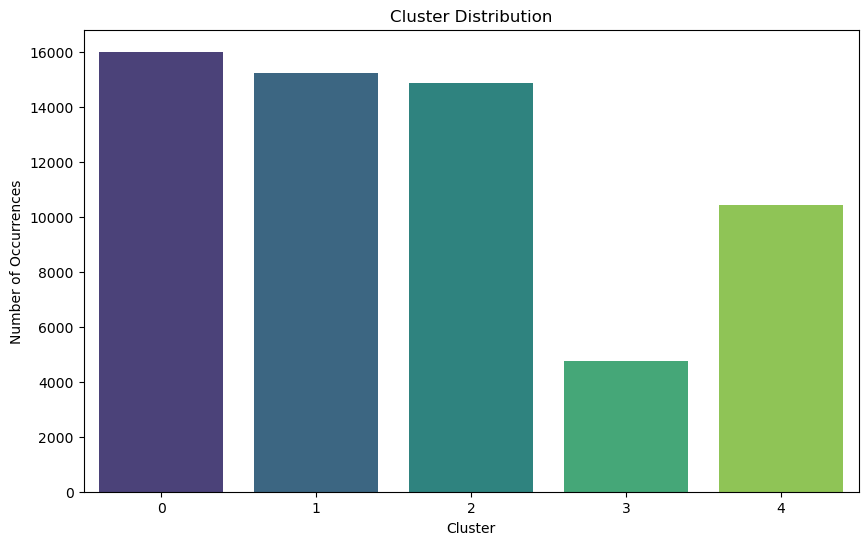

In [101]:
import seaborn as sns

# Bar plot for cluster distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Occurrences')
plt.xticks(range(optimal_k))
plt.show()


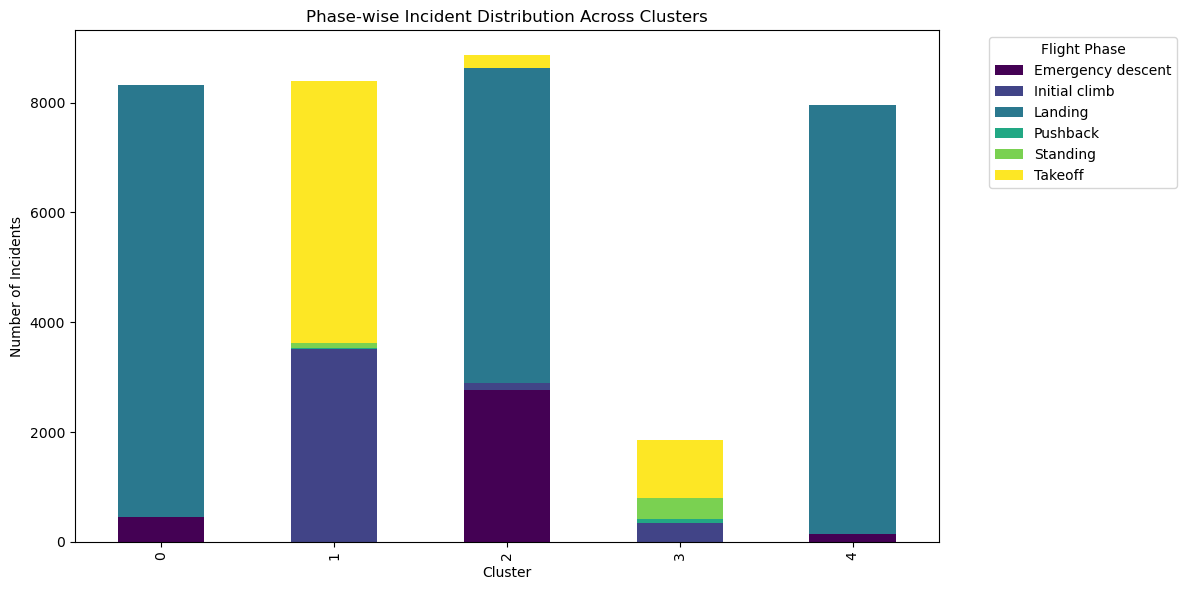

In [102]:
# Extract phases from descriptions
final_merged_df['phase'] = final_merged_df['total_occurance'].str.extract(r'^(Landing|Initial climb|Takeoff|Standing|Pushback|Emergency descent)')

# Count phase occurrences per cluster
phase_cluster_counts = final_merged_df.groupby(['cluster', 'phase']).size().unstack(fill_value=0)

# Stacked bar plot
phase_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Phase-wise Incident Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.legend(title='Flight Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
